# Preparing The Environment¶

In [8]:
from google.colab import drive
drive.mount("/content/drive")

%cd "/content/drive/My Drive"
%ls

%cd "/content/drive/My Drive/ML_Ex2_Team_34/data"
%ls

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).
/content/drive/My Drive
ML_Ex2_Team_34/  solution/
/content/drive/My Drive/ML_Ex2_Team_34/data
ElectionDataPortugal.csv  parkinsons_updrs.csv


In [1]:
%pip uninstall imgaug && pip uninstall albumentations 
%pip deinstall setuptools && pip install setuptools > 41.0.0
%pip deinstall folium && pip install folium < 0.2.2
%pip install -U pip
%pip uninstall setuptools
%pip install 'setuptools<20.2'
%pip install imgaug < 1.7.0 && pip install albumentations < 0.2.7

Found existing installation: setuptools 20.1.1
Uninstalling setuptools-20.1.1:
  Would remove:
    /usr/local/bin/easy_install
    /usr/local/bin/easy_install-3.7
    /usr/local/lib/python3.7/dist-packages/_markerlib/*
    /usr/local/lib/python3.7/dist-packages/easy_install.py
    /usr/local/lib/python3.7/dist-packages/pkg_resources/*
    /usr/local/lib/python3.7/dist-packages/setuptools-20.1.1.dist-info/*
    /usr/local/lib/python3.7/dist-packages/setuptools/*
Proceed (Y/n)? y
  Successfully uninstalled setuptools-20.1.1
  Using cached setuptools-20.1.1-py2.py3-none-any.whl (472 kB)
ERROR: pip's dependency resolver does not currently take into account all the packages that are installed. This behaviour is the source of the following dependency conflicts.
xarray 0.18.2 requires setuptools>=40.4, but you have setuptools 20.1.1 which is incompatible.
tensorboard 2.7.0 requires setuptools>=41.0.0, but you have setuptools 20.1.1 which is incompatible.
google-auth 1.35.0 requires setuptools

/bin/bash: 1.7.0: No such file or directory


In [4]:
%pip install auto-sklearn
%pip install deap update_checker tqdm stopit xgboost
%pip install tpot

     |████████████████████████████████| 87 kB 6.0 MB/s             
     |████████████████████████████████| 173.5 MB 10.0 kB/s           
  Attempting uninstall: xgboost
    Found existing installation: xgboost 0.90
    Uninstalling xgboost-0.90:
      Successfully uninstalled xgboost-0.90


In [5]:
import autosklearn.regression
import sklearn.metrics
import sklearn.datasets
import sklearn.preprocessing

from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression, LinearRegression
from sklearn.ensemble import RandomForestRegressor
from sklearn.tree import DecisionTreeRegressor

import matplotlib.pyplot as plt
from datetime import datetime


from tpot import TPOTRegressor

import numpy as np
import pandas as pd
import sys
import os
import seaborn as sns
import plotly.graph_objects as go
import matplotlib.pyplot as plt
from plotly.subplots import make_subplots
from sklearn.preprocessing import StandardScaler, RobustScaler, MinMaxScaler, Normalizer, MaxAbsScaler

%matplotlib inline

In [9]:
sys.path.append("..")
from config_ML import PARKINSONS_TELEMONITORING, RANDOM_SEED

# PRE-PROSSESSING

### Reading data and removing outliers

In [10]:
parkinson_monitoring = pd.read_csv(PARKINSONS_TELEMONITORING, sep=",")

In [11]:
parkinson_monitoring.head()

,subject#,age,sex,test_time,motor_UPDRS,total_UPDRS,Jitter(%),Jitter(Abs),Jitter:RAP,Jitter:PPQ5,Jitter:DDP,Shimmer,Shimmer(dB),Shimmer:APQ3,Shimmer:APQ5,Shimmer:APQ11,Shimmer:DDA,NHR,HNR,RPDE,DFA,PPE
0,1,72,0,5.6431,28.199,34.398,0.00662,0.000034,0.00401,0.00317,0.01204,0.02565,0.230,0.01438,0.01309,0.01662,0.04314,0.014290,21.640,0.41888,0.54842,0.16006
1,1,72,0,12.6660,28.447,34.894,0.00300,0.000017,0.00132,0.00150,0.00395,0.02024,0.179,0.00994,0.01072,0.01689,0.02982,0.011112,27.183,0.43493,0.56477,0.10810
2,1,72,0,19.6810,28.695,35.389,0.00481,0.000025,0.00205,0.00208,0.00616,0.01675,0.181,0.00734,0.00844,0.01458,0.02202,0.020220,23.047,0.46222,0.54405,0.21014
3,1,72,0,25.6470,28.905,35.810,0.00528,0.000027,0.00191,0.00264,0.00573,0.02309,0.327,0.01106,0.01265,0.01963,0.03317,0.027837,24.445,0.48730,0.57794,0.33277
4,1,72,0,33.6420,29.187,36.375,0.00335,0.000020,0.00093,0.00130,0.00278,0.01703,0.176,0.00679,0.00929,0.01819,0.02036,0.011625,26.126,0.47188,0.56122,0.19361


### Dataset description

In [12]:
parkinson_monitoring.info() #no missing values

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5875 entries, 0 to 5874
Data columns (total 22 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   subject#       5875 non-null   int64  
 1   age            5875 non-null   int64  
 2   sex            5875 non-null   int64  
 3   test_time      5875 non-null   float64
 4   motor_UPDRS    5875 non-null   float64
 5   total_UPDRS    5875 non-null   float64
 6   Jitter(%)      5875 non-null   float64
 7   Jitter(Abs)    5875 non-null   float64
 8   Jitter:RAP     5875 non-null   float64
 9   Jitter:PPQ5    5875 non-null   float64
 10  Jitter:DDP     5875 non-null   float64
 11  Shimmer        5875 non-null   float64
 12  Shimmer(dB)    5875 non-null   float64
 13  Shimmer:APQ3   5875 non-null   float64
 14  Shimmer:APQ5   5875 non-null   float64
 15  Shimmer:APQ11  5875 non-null   float64
 16  Shimmer:DDA    5875 non-null   float64
 17  NHR            5875 non-null   float64
 18  HNR     

/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2619: FutureWarning:

`distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).



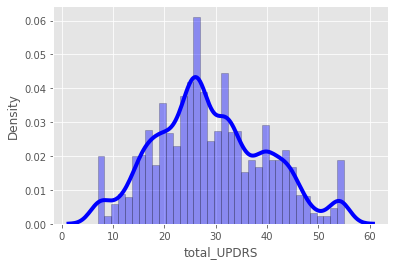

In [13]:
plt.style.use('ggplot')
sns.distplot(parkinson_monitoring['total_UPDRS'], hist=True, kde=True, 
             bins=int(180/5), color = 'blue', 
             hist_kws={'edgecolor':'black'},
             kde_kws={'linewidth': 4}, axlabel="total_UPDRS")


/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2619: FutureWarning:

`distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).



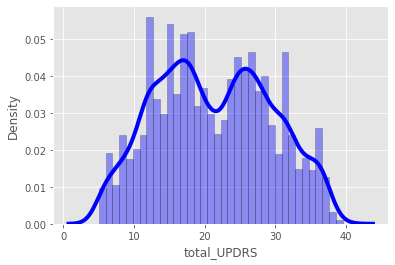

In [14]:
sns.distplot(parkinson_monitoring['motor_UPDRS'], hist=True, kde=True, 
             bins=int(180/5), color = 'blue', 
             hist_kws={'edgecolor':'black'},
             kde_kws={'linewidth': 4}, axlabel="total_UPDRS")


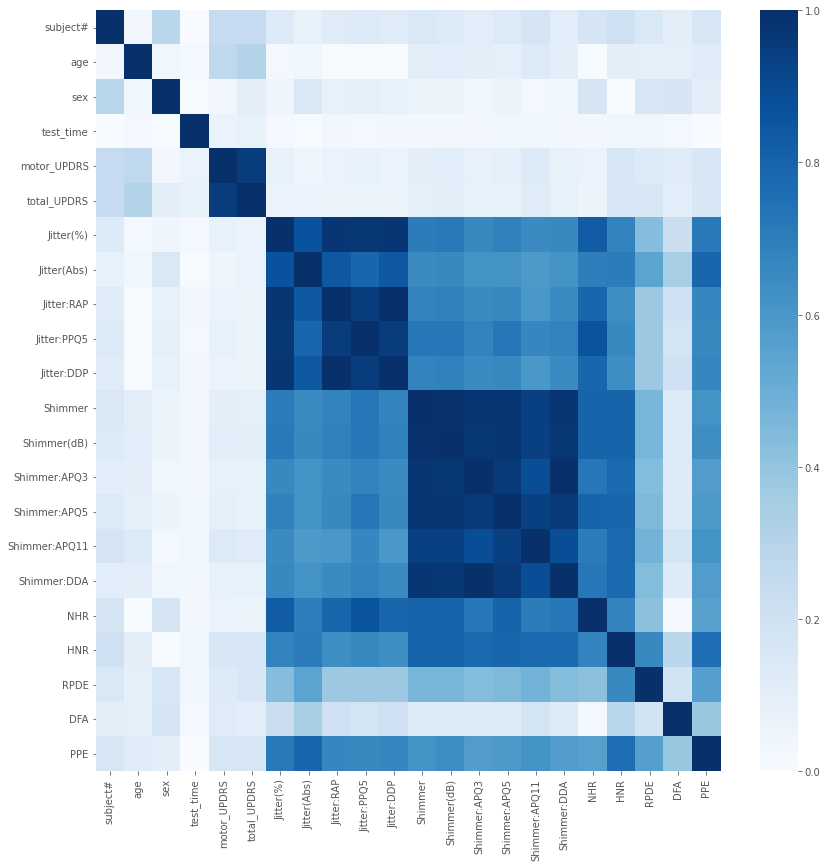

In [15]:
fig, ax = plt.subplots(figsize=(14,14))

sns.heatmap(abs(parkinson_monitoring.corr().round(2)),cmap="Blues", annot=False, ax=ax) # strong correlation between variables so we can use all variable in the model

### Feature selection and creation

In [16]:
target_1 = ['motor_UPDRS']
target_2 = ['total_UPDRS']

In [17]:
features = parkinson_monitoring.columns.tolist()

In [18]:
features

['subject#',
 'age',
 'sex',
 'test_time',
 'motor_UPDRS',
 'total_UPDRS',
 'Jitter(%)',
 'Jitter(Abs)',
 'Jitter:RAP',
 'Jitter:PPQ5',
 'Jitter:DDP',
 'Shimmer',
 'Shimmer(dB)',
 'Shimmer:APQ3',
 'Shimmer:APQ5',
 'Shimmer:APQ11',
 'Shimmer:DDA',
 'NHR',
 'HNR',
 'RPDE',
 'DFA',
 'PPE']

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning:

Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.



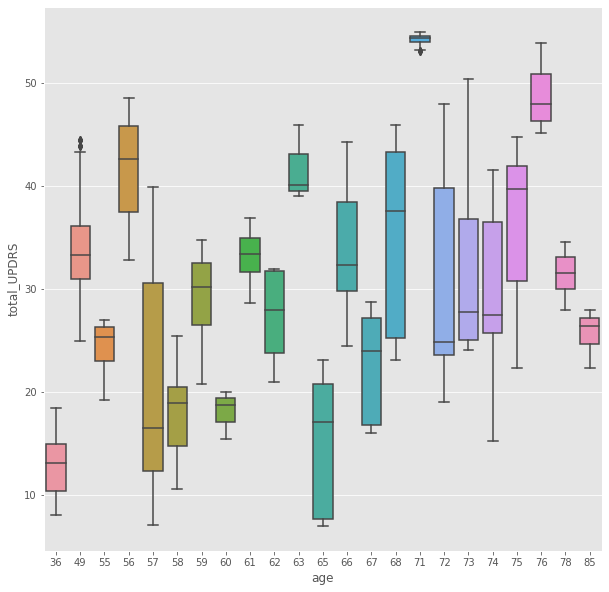

In [19]:
fig, ax = plt.subplots(figsize=(10,10))
sns.boxplot(parkinson_monitoring.age, parkinson_monitoring.total_UPDRS,orient="v", ax=ax)

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning:

Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.



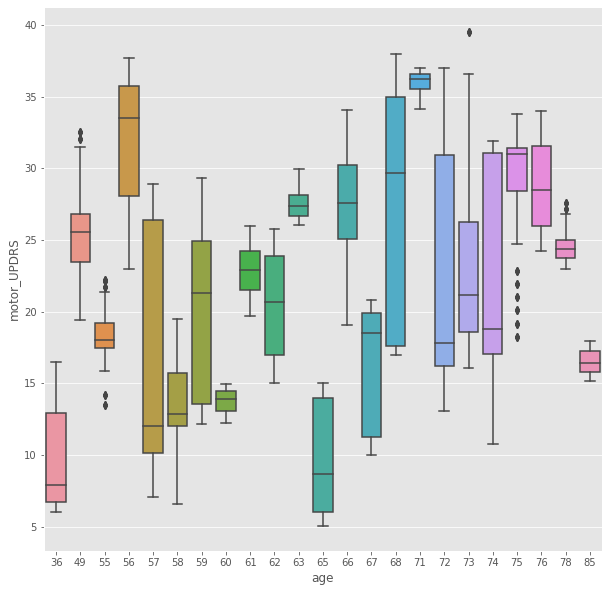

In [20]:
fig, ax = plt.subplots(figsize=(10,10))
sns.boxplot(parkinson_monitoring.age, parkinson_monitoring.motor_UPDRS,orient="v", ax=ax)

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning:

Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.



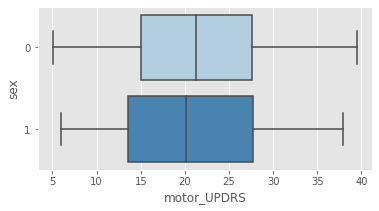

In [21]:
fig, ax = plt.subplots(figsize=(6,3))
sns.boxplot(parkinson_monitoring.motor_UPDRS, parkinson_monitoring.sex,orient="h", palette="Blues", ax=ax)

In [22]:
df = parkinson_monitoring[features].copy()

In [23]:
df.sex = df.sex.astype(str)
df = pd.get_dummies(df)

# Shuffle split of data¶

In [24]:
from sklearn.model_selection import train_test_split, StratifiedShuffleSplit, KFold

In [25]:
split = StratifiedShuffleSplit(n_splits=1, test_size=0.33, random_state=RANDOM_SEED)

In [26]:
for train_index, test_index in split.split(df, parkinson_monitoring.age.astype(str)):
    df_train = df.iloc[train_index, :].copy()
    df_test = df.iloc[test_index, :].copy()

In [27]:
model_features = list(df_train.columns)
model_features.remove("motor_UPDRS") 
model_features.remove("total_UPDRS")

In [28]:
model_features

['subject#',
 'age',
 'test_time',
 'Jitter(%)',
 'Jitter(Abs)',
 'Jitter:RAP',
 'Jitter:PPQ5',
 'Jitter:DDP',
 'Shimmer',
 'Shimmer(dB)',
 'Shimmer:APQ3',
 'Shimmer:APQ5',
 'Shimmer:APQ11',
 'Shimmer:DDA',
 'NHR',
 'HNR',
 'RPDE',
 'DFA',
 'PPE',
 'sex_0',
 'sex_1']

In [29]:
X_train = df_train[model_features]
X_test = df_test[model_features]

y_train = df_train[["motor_UPDRS", "total_UPDRS"]]

y_test = df_test[["motor_UPDRS", "total_UPDRS"]]

X = df[model_features]
Y = df[["motor_UPDRS", "total_UPDRS"]]

In [30]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5875 entries, 0 to 5874
Data columns (total 23 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   subject#       5875 non-null   int64  
 1   age            5875 non-null   int64  
 2   test_time      5875 non-null   float64
 3   motor_UPDRS    5875 non-null   float64
 4   total_UPDRS    5875 non-null   float64
 5   Jitter(%)      5875 non-null   float64
 6   Jitter(Abs)    5875 non-null   float64
 7   Jitter:RAP     5875 non-null   float64
 8   Jitter:PPQ5    5875 non-null   float64
 9   Jitter:DDP     5875 non-null   float64
 10  Shimmer        5875 non-null   float64
 11  Shimmer(dB)    5875 non-null   float64
 12  Shimmer:APQ3   5875 non-null   float64
 13  Shimmer:APQ5   5875 non-null   float64
 14  Shimmer:APQ11  5875 non-null   float64
 15  Shimmer:DDA    5875 non-null   float64
 16  NHR            5875 non-null   float64
 17  HNR            5875 non-null   float64
 18  RPDE    

In [31]:
X_train

,subject#,age,test_time,Jitter(%),Jitter(Abs),Jitter:RAP,Jitter:PPQ5,Jitter:DDP,Shimmer,Shimmer(dB),Shimmer:APQ3,Shimmer:APQ5,Shimmer:APQ11,Shimmer:DDA,NHR,HNR,RPDE,DFA,PPE,sex_0,sex_1
680,5,75,63.391,0.00587,0.000043,0.00259,0.00296,0.00778,0.02980,0.343,0.01591,0.01763,0.02390,0.04774,0.028664,22.131,0.56379,0.60815,0.24530,1,0
186,2,58,94.775,0.00672,0.000058,0.00314,0.00362,0.00943,0.05400,0.455,0.02895,0.03383,0.04179,0.08686,0.019418,17.900,0.55877,0.78886,0.27465,1,0
4782,35,71,62.409,0.00546,0.000039,0.00253,0.00297,0.00759,0.03453,0.319,0.01635,0.02151,0.02965,0.04905,0.009441,21.095,0.43336,0.76035,0.24398,1,0
481,4,74,156.710,0.00481,0.000040,0.00216,0.00270,0.00647,0.05452,0.493,0.03112,0.03254,0.03554,0.09335,0.026240,21.433,0.61433,0.63470,0.22434,1,0
3388,25,76,34.400,0.00404,0.000040,0.00206,0.00240,0.00618,0.03154,0.277,0.01551,0.01834,0.02995,0.04654,0.012053,22.684,0.63038,0.59009,0.17516,1,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1722,12,62,140.360,0.00351,0.000022,0.00175,0.00216,0.00525,0.02311,0.199,0.01242,0.01398,0.01959,0.03725,0.008072,22.483,0.55262,0.57679,0.21805,1,0
2612,19,55,60.732,0.00942,0.000069,0.00514,0.00453,0.01542,0.02391,0.209,0.01281,0.01334,0.01925,0.03842,0.014684,20.080,0.54682,0.74196,0.29831,1,0
4572,34,59,101.590,0.00565,0.000055,0.00228,0.00304,0.00683,0.01265,0.110,0.00497,0.00701,0.01474,0.01491,0.016469,22.473,0.66255,0.73961,0.25142,1,0
1665,12,62,105.370,0.00439,0.000030,0.00217,0.00239,0.00651,0.02509,0.239,0.01390,0.01343,0.02023,0.04170,0.012369,23.197,0.60176,0.60854,0.17986,1,0


In [32]:
X_train.shape, y_train.shape

((3936, 21), (3936, 2))

# Creating & Applying the AutoML system on the datasets

In [44]:
class MLAlgorithm:
    def __init__(self, algorithm_dict):
        self.generator = algorithm_dict['algorithm']
        # self.hyperparameter_ranges = algorithm_dict['hyperparameters']
        self.hyperparameter_ranges = list(algorithm_dict['hyperparameters'].items())
        self.algorithm_dict = algorithm_dict

        self.indicies = [0]*len(self.hyperparameter_ranges)
        self.hyperparameters = None
        self.algorithm = None

    def fit(self, X, Y):
        self.hyperparameters = {
            param:values[self.indicies[i]]
            for i, (param,values) in enumerate(self.hyperparameter_ranges)
        }
        # print(self.hyperparameters)

        self.algorithm = self.generator(**self.hyperparameters)
        self.algorithm.fit(X, Y)
    
    def predict(self, X):
        return self.algorithm.predict(X)

    def get_score(self, y_true, y_pred):
        sqrt = np.sqrt(sklearn.metrics.mean_squared_error(y_true, y_pred))
        return sqrt

    def get_neighbours(self):
        neighbours = []
        for i, j in enumerate(self.indicies):
            if j+1 == len(self.hyperparameter_ranges[i][1]):
                continue
            
            # len(self.indicies[i]):
            
            neighbour = MLAlgorithm(self.algorithm_dict)
            neighbour.indicies = self.indicies.copy()
            neighbour.indicies[i] = j+1
            neighbours.append(neighbour)

        return neighbours

class AutoML:
    """
        Implements the Auto ML system using a hill climbing algorithm.
    """
    def __init__(self, ml_algorithms, criteria=min):
        self.ml_algorithms = ml_algorithms
        self.criteria = criteria
        self.best_algorithm = None
        self.best_score = float('inf')
        self.best_hyperparameters = None
        self.scores = [float('inf')]*len(ml_algorithms)
    
    def fit(self, X_train, Y_train, X_test, Y_test):
        for i, algorithm in enumerate(self.ml_algorithms):
            algorithm.fit(X_train, Y_train)
            y_pred = algorithm.predict(X_test)
            score = algorithm.get_score(Y_test, y_pred)
            self.scores[i] = score

            if self.criteria(score, self.best_score) == score:
                self.best_score = score
                self.best_algorithm = algorithm

    def single_auto_ml_iteration(self, X_train, Y_train, X_test, Y_test):
        # get the initial scores
        self.fit(X_train, Y_train, X_test, Y_test)

        # create a copy list that will carry the new ml_algorithms
        new_solutions = self.ml_algorithms.copy()
        for i, algorithm in enumerate(self.ml_algorithms):
            # get the neighbours of the current solution (same algorithm, different hyperparameters)
            neighbours = algorithm.get_neighbours()

            # assume the initial algorithm is the best in the beginning
            best_score = self.scores[i]
            best_neighbour = new_solutions[i]

            # compute the score for every neighbour (RMSE)
            for neighbour in neighbours:
                neighbour.fit(X_train, Y_train)
                y_pred = neighbour.predict(X_test)
                score = neighbour.get_score(Y_test, y_pred)

                # keep track of the best neighbour
                if self.criteria(score, best_score) == score:
                    best_score = score
                    best_neighbour = neighbour

            # update the lists            
            self.scores[i] = best_score
            new_solutions[i] = best_neighbour

            if self.criteria(self.scores[i], self.best_score) == self.scores[i]:
                self.best_algorithm = best_neighbour
                self.best_score = self.scores[i]
                self.best_hyperparameters = best_neighbour.hyperparameters

        self.ml_algorithms = new_solutions
        
    def get_best_algorithm(self, iterations, X_train, Y_train, X_test, Y_test):
        for _ in range(iterations):
            self.single_auto_ml_iteration(X_train, Y_train, X_test, Y_test)
        
        return {'algorithm': self.best_algorithm,
                'score': self.best_score,
                'hyperparameters': self.best_hyperparameters}
    
    def print_summary(self):
        for i, algorithm in enumerate(self.ml_algorithms):
            print(f"{algorithm.algorithm}: score='{self.scores[i]}', hyperparameters='{algorithm.hyperparameters}'")

In [45]:
algorithm1 = {
        'algorithm': RandomForestRegressor,
        'hyperparameters': {
            'n_estimators': [100, 150, 200, 300],
            'max_depth': np.arange(3, 15),
        }
    }

algorithm2 = {
        'algorithm': DecisionTreeRegressor,
        'hyperparameters': {
            'max_depth': np.arange(3, 15),
        }
    }

algorithm3 = {
        'algorithm': LinearRegression,
        'hyperparameters': {
            'normalize': [False, True],
            'fit_intercept': [True, False],
        }
    }

algorithms = [algorithm1, algorithm2, algorithm3]
algorithms = [MLAlgorithm(algo) for algo in algorithms]

automl_system = AutoML(algorithms)


print(f"Testing my system against dataset PARKINSONS_TELEMONITORING")
print(f"X_train shape: {X_train.shape}")
print(f"y_train shape: {y_train.shape}")

print(f"X_test shape: {X_test.shape}")
print(f"y_test shape: {y_test.shape}")

iterations = 5
best_algorithm = automl_system.get_best_algorithm(iterations, 
                                                    X_train, 
                                                    y_train, 
                                                    X_test, 
                                                    y_test)
    
print("System summary:-")
automl_system.print_summary()

print(f"The best algorithm for dataset PARKINSONS_TELEMONITORING:", end=" ")
print(best_algorithm['algorithm'].algorithm)

print("The best hyperparameters for this algorithm:", end=" ")
print(best_algorithm['hyperparameters'])

print("The RMSE score of this algorithm:", end=" ")
print(best_algorithm['score'])

train_predictions = best_algorithm['algorithm'].predict(X_train)
print("Train R2 score:", sklearn.metrics.r2_score(y_train, train_predictions))

test_predictions = best_algorithm['algorithm'].predict(X_test)
print("Test R2 score:", sklearn.metrics.r2_score(y_test, test_predictions))
print("-"*40)

Testing my system against dataset PARKINSONS_TELEMONITORING
X_train shape: (3936, 21)
y_train shape: (3936, 2)
X_test shape: (1939, 21)
y_test shape: (1939, 2)
System summary:-
RandomForestRegressor(max_depth=8): score='1.095763759692603', hyperparameters='{'n_estimators': 100, 'max_depth': 8}'
DecisionTreeRegressor(max_depth=8): score='1.5895426669246868', hyperparameters='{'max_depth': 8}'
LinearRegression(normalize=True): score='8.223060994749689', hyperparameters='{'normalize': True, 'fit_intercept': True}'
The best algorithm for dataset PARKINSONS_TELEMONITORING: RandomForestRegressor(max_depth=8)
The best hyperparameters for this algorithm: {'n_estimators': 100, 'max_depth': 8}
The RMSE score of this algorithm: 1.095763759692603
Train R2 score: 0.9899508957129881
Test R2 score: 0.9860314360370027
----------------------------------------


# Comparing our system to sklearn-automl system

In [41]:
print(f"Testing auto-sklearn system against dataset Parkinsons Telemonitoring")
print(f"X_train shape: {X_train.shape}")
print(f"y_train shape: {y_train.shape}")

print(f"X_test shape: {X_test.shape}")
print(f"y_test shape: {y_test.shape}")
print()

automl = autosklearn.regression.AutoSklearnRegressor(
    time_left_for_this_task=180,
    per_run_time_limit=40,
    tmp_folder='telmp',
    )

automl.fit(X_train, y_train)

print("Leaderboard:")
print(automl.leaderboard())

train_predictions = automl.predict(X_train)
print("Train R2 score:", sklearn.metrics.r2_score(y_train, train_predictions))

test_predictions = automl.predict(X_test)
print("Test R2 score:", sklearn.metrics.r2_score(y_test, test_predictions))

Testing auto-sklearn system against dataset Parkinsons Telemonitoring
X_train shape: (3936, 21)
y_train shape: (3936, 2)
X_test shape: (1939, 21)
y_test shape: (1939, 2)

[WARNING] [2021-12-13 16:42:04,710:Client-AutoMLSMBO(1)::99efc8f4-5c33-11ec-84e0-0242ac1c0002] Could not find meta-data directory /usr/local/lib/python3.7/dist-packages/autosklearn/metalearning/files/r2_multioutput.regression_dense
Leaderboard:
          rank  ensemble_weight                 type      cost  duration
model_id                                                                
10           1             0.66        decision_tree  0.028403  0.702690
13           2             0.16        decision_tree  0.033451  0.694251
17           3             0.16        decision_tree  0.046807  2.264843
5            4             0.02  k_nearest_neighbors  0.622312  0.640339
Train R2 score: 0.9833483341819802
Test R2 score: 0.9867904479726832


# Comparing our system to TPOT auto ml system

In [46]:
# I've lowered the population size and the generation size to make 
# the notebook run in a resonable time
# increasing the numbers would yield a far better accuracy for sure

print(f"Testing TPOT system against dataset Parkinsons Telemonitoring")
print(f"X_train shape: {X_train.shape}")
print(f"y_train shape: {y_train.shape}")

print(f"X_test shape: {X_test.shape}")
print(f"y_test shape: {y_test.shape}")
print()
tpot = TPOTRegressor(generations=2, 
                     population_size=5, 
                     verbosity=2, 
                     random_state=42)
tpot.fit(X_train, y_train)

print("MSE:",tpot.score(X_test, y_test))
print("RMSE:",np.sqrt(tpot.score(X_test, y_test)))

train_predictions = tpot.predict(X_train)
print("Train R2 score:", sklearn.metrics.r2_score(y_train, train_predictions))

test_predictions = tpot.predict(X_test)
print("Test R2 score:", sklearn.metrics.r2_score(y_test, test_predictions))

Testing TPOT system against dataset Parkinsons Telemonitoring
X_train shape: (3936, 21)
y_train shape: (3936, 2)
X_test shape: (1939, 21)
y_test shape: (1939, 2)



ValueError: ignored